**Universidade Estadual de Campinas - Unicamp**

**Faculdade de Tecnologia - FT**

**Autor:** Ulisses Martins Dias

**Disciplina:** TT003 - Tópicos em Computação e Informática III

**Aula 03:** Apresentação da Biblioteca Pytorch

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ulissesdias/tt003/blob/main/notebooks/aula03_pytorch_intro.ipynb)

# Objetivo da Aula

Queremos criar um oráculo e já fizemos progressos entendendo a noção de descida do gradiente. A descida do gradiente permite encontrar valores dos parâmetros de maneira mais eficiente do que uma busca exaustiva. Entretanto, muita coisa ainda pode ser melhorada na maneira como estamos escrevendo os nossos códigos, mas devemos realizar essas melhorias passo a passo.

Na aula de hoje, vamos tentar escrever códigos mais eficientes usando uma biblioteca do python que nos permitirá tratar as estruturas de dados em memória de maneira mais eficiente. Posteriormente, na próxima aula, veremos que esta biblioteca ainda poderá nos ajudar computando o gradiente por nós.

# PyTorch

O PyTorch é uma biblioteca de aprendizado de máquina de código aberto usada em aprendizado de máquina, com grande suporte a *deep learning*. Essa biblioteca foi desenvolvida pelo laboratório de pesquisa de IA do Facebook. Uma das vantagens é que o PyTorch permite utilizar programação orientada a objetos para definição de arquiteturas.

Vamos hoje conhecer um pouco mais o PyTorch e usá-lo para reescrever o que já conhecemos de aulas anteriores. Ao final da aula, vamos tentar expandir os nossos conhecimentos com um vislumbre de redes neurais.

# Tensores

Os tensores são uma estrutura de dados muito semelhantes a arrays e matrizes. No contexto de aprendizado de máquina, tensores são uma generalização de arrays e matrizes para um número arbitrário de dimensões.

Em PyTorch, usamos tensores para codificar as entradas e saídas de um modelo, assim como os parâmetros do modelo. Em outras palavras, os tensores vão unificar a organização de todos os dados que usaremos de agora em diante.

Os tensores podem executar em GPUs ou outros aceleradores de hardware.  Tensores também são otimizados para diferenciação automática. Vamos começar importando a biblioteca.

In [1]:
import torch

**Inicialização de Tensores**

Os tensores podem ser inicializados de várias maneiras. Eles podem armazenar números em ponto flutuante de maneira organizada para as redes neurais lidarem com a informação.

Em essência, uma lista convencional de python organiza os dados na memória de uma forma em que cada elemento possui o seu próprio endereço. Os tensores do PyTorch organizam os dados de maneira contígua, o que garante um aumento de eficiência.

Dê uma olhada nos seguintes exemplos:

In [2]:
# Criando um simples escalar
scalar = torch.tensor(10)
scalar

tensor(10)

In [3]:
# Vendo o numero de dimensões, como
# temos um escalar, o número de
# dimensões é zero
scalar.ndim

0

In [4]:
# Inicializando uma lista de tamanho 3 aleatoriamente entre 0 e 1
vector = torch.rand(3)
vector

tensor([0.1521, 0.9239, 0.5595])

In [5]:
# Um vetor é unidimensional
vector.ndim

1

In [6]:
# Inicializando aleatoriamente em uma distribuição normal
vector = torch.normal(mean = 0, std = torch.tensor([1.0]))
vector

tensor([1.3463])

In [7]:
# Inicializando dados com mais dimensões:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [8]:
# Número de dimensões dessa matriz
x_data.ndim

2

In [9]:
# Podemos ver o número de elementos dentro de tensor
x_data.numel()

4

**Operações Aritméticas com Tensores**

De posse de um tensor, podemos executar várias operações matemáticas com os elementos dentro dele. Observe que as operações a seguir não precisam de um laço de repetição, como seria o caso se tivéssemos armazenado os dados com a lista padrão do python.

In [10]:
x_data + 2

tensor([[3, 4],
        [5, 6]])

In [11]:
x_data - 2

tensor([[-1,  0],
        [ 1,  2]])

In [12]:
x_data * 2

tensor([[2, 4],
        [6, 8]])

In [13]:
x_data / 2

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])

In [14]:
x_data // 2 ## Divisão Inteira

tensor([[0, 1],
        [1, 2]])

In [15]:
x_data % 2 ## Resto da divisão

tensor([[1, 0],
        [1, 0]])

In [16]:
x_data ** 2 ## Potência

tensor([[ 1,  4],
        [ 9, 16]])

In [17]:
2 ** x_data ## Exponenciação

tensor([[ 2,  4],
        [ 8, 16]])

In [18]:
x_data * x_data

tensor([[ 1,  4],
        [ 9, 16]])

In [19]:
x_data / x_data

tensor([[1., 1.],
        [1., 1.]])

**Exercício**

Vamos dar uma pausa para resolver o seguinte exercício. Vamos supor que temos um vetor chamado de y com valores 0 ou 1. Além disso, temos um vetor chamado de y_pred com valores reais no intervalo entre 0 e 1. Da seguinte forma:

In [20]:
y = torch.tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
        0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
        1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
        1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
        0., 1.])

y_pred = torch.tensor([0.99,0.01,0.98,0.12,0.99,0.01,0.99,0.99,0.01,0.99,0.01,
        0.99,0.99,0.01,0.99,0.01,0.12,0.99,0.01,0.99,0.01,0.01,0.99,0.82,0.98,
        0.99,0.01,0.99,0.99,0.99,0.97,0.99,0.50,0.99,0.98,0.01,0.01,0.99,0.03,
        0.99,0.99,0.02,0.99,0.02,0.97,0.99,0.27,0.01,0.99,0.03,0.99,0.99,0.01,
        0.99,0.01,0.99,0.92,0.27,0.99,0.99,0.03,0.99,0.01,0.99,0.05,0.99,0.99,
        0.99,0.38,0.97,0.99,0.01,0.99,0.92,0.12,0.99,0.05,0.99,0.99,0.99,0.99,
        0.99,0.88,0.38,0.97,0.99,0.99,0.99,0.01,0.99,0.05,0.99,0.01,0.99,0.18,
        0.95,0.99,0.99,0.01,0.99,0.12,0.99,0.01,0.99,0.99,0.01,0.99,0.01,0.99,
        0.99,0.99,0.03,0.99,0.99,0.03,0.99,0.01,0.99,0.03,0.99,0.01,0.82,0.99,
        0.01,0.99,0.99,0.01,0.99,0.01,0.99,0.01,0.99,0.01,0.99,0.01,0.99,0.01,
        0.99,0.01,0.99,0.99,0.05,0.99,0.99,0.99,0.03,0.99,0.01,0.99,0.01,0.99,
        0.99,0.38,0.99,0.92,0.88,0.99,0.99,0.01,0.99,0.01,0.99,0.02,0.99,0.50,
        0.99,0.18,0.99,0.01,0.99,0.01,0.01,0.99,0.73,0.99,0.99,0.97,0.01,0.99,
        0.98,0.01,0.99,0.99,0.99,0.01,0.99,0.99,0.01,0.99,0.01,0.99,0.01,0.99,
        0.99,0.99,0.99,0.99,0.99,0.01,0.99,0.05,0.99,0.99,0.01,0.99,0.01,0.99,
        0.99,0.01,0.99,0.92,0.99,0.01,0.99,0.27,0.99,0.01,0.99,0.01,0.99,0.01,
        0.99,0.01,0.99,0.99,0.99,0.99,0.99,0.88,0.99,0.88,0.01,0.99,0.01,0.99,
        0.01,0.01,0.99,0.99,0.27,0.99,0.01,0.99,0.18,0.99,0.99,0.01,0.99,0.62,
        0.98,0.01,0.99,0.97,0.97,0.99,0.99,0.92,0.99,0.01,0.99,0.99,0.99,0.02,
        0.99,0.01,0.05,0.99,0.99,0.01,0.99,0.01,0.98])


y.shape, y_pred.shape

(torch.Size([272]), torch.Size([272]))

Agora crie uma função que implementa *erro quadrático médio* aprendido em aulas anteriores com essas estruturas.

In [21]:
#ToDo: Implemente a função abaixo
def erro_quadratico_medio(y_pred, y) :
    return 1

erro_quadratico_medio(y_pred, y)

1

Vale mencionar que esta função já está implementada na biblioteca PyTorch. Nesse caso, o seu valor deverá ser igual ao visto a seguir:

In [22]:
loss_fn = torch.nn.MSELoss()
loss_fn(y_pred, y).item()

0.03068603202700615

Uma outra função interessante de se programar é a função de custo conhecida como *entropia cruzada binária*, cuja fórmula é:
$$ -\frac{1}{n} \sum_{i=1}^n  [ y_i \log(\hat y_i) + (1-y_i)  \log(1-\hat y_i) ]$$


In [23]:
# ToDo: Implemente esta função abaixo.
def entropia_cruzada_binaria(y_pred, y) :
    return 1

entropia_cruzada_binaria(y_pred, y)

1

Vale também mencionar que esta função já está implementada na biblioteca PyTorch. Nesse caso, o seu valor deverá ser igual ao visto a seguir:

In [24]:
loss_fn = torch.nn.BCELoss()
loss_fn(y_pred, y).item()

0.12697304785251617

**Operações de Comparação com Tensores**

A seguir, um conjunto de operações de comparação que permitem gerar tensores binários.

In [25]:
x_data > 2

tensor([[False, False],
        [ True,  True]])

In [26]:
x_data != 3

tensor([[ True,  True],
        [False,  True]])

In [27]:
1 < x_data

tensor([[False,  True],
        [ True,  True]])

In [28]:
x_data == 3

tensor([[False, False],
        [ True, False]])

In [29]:
x_data ** 2 > 10

tensor([[False, False],
        [False,  True]])

In [30]:
2 ** (x_data < 4)

tensor([[2, 2],
        [2, 1]])

**Operações booleanas com Tensores**

In [31]:
a = torch.Tensor([True, False, True, False])
b = torch.Tensor([True, True, False, False])

In [32]:
torch.logical_and(a, b)

tensor([ True, False, False, False])

In [33]:
torch.logical_or(a, b)

tensor([ True,  True,  True, False])

In [34]:
torch.logical_not(a)

tensor([False,  True, False,  True])

**Exercício**

Vamos dar uma segunda pausa para que você possa usar os vetores $y$ e $\hat y$ novamente. Escreva uma função que retorne um vetor de booleanos em que cada posição $i$ desse vetor deve ser preenchida da seguinte forma:

* **True**: se $y_i$ e $\hat y_i$ forem ambos maiores que 0.5
* **True**: se $y_i$ e $\hat y_i$ forem ambos menores ou iguais a 0.5
* **False**: qualquer outra situação.

In [35]:
# ToDo: Implemente a função a seguir
def right_predictions(y_pred, y) :
    return 1

right_predictions(y_pred, y)

1

Compare sua resposta com o resultado a seguir:

In [36]:
answer = torch.tensor([ True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True])
answer

tensor([ True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

**Outras Inicializações de Tensores**

In [37]:
# Inicializando uma matriz identidade 3 x 3
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [38]:
# Inicializando uma matriz identidade 5 x 5
torch.eye(5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [39]:
# Criando um intervalo linear entre 2 e 10
# com 25 elementos
torch.linspace(2, 10, steps = 25)

tensor([ 2.0000,  2.3333,  2.6667,  3.0000,  3.3333,  3.6667,  4.0000,  4.3333,
         4.6667,  5.0000,  5.3333,  5.6667,  6.0000,  6.3333,  6.6667,  7.0000,
         7.3333,  7.6667,  8.0000,  8.3333,  8.6667,  9.0000,  9.3333,  9.6667,
        10.0000])

In [40]:
# Criando um intervalo logarítmico entre 10^2 e 10^10
# com 25 elementos
torch.logspace(2, 10, steps = 25)

tensor([1.0000e+02, 2.1544e+02, 4.6416e+02, 1.0000e+03, 2.1544e+03, 4.6416e+03,
        1.0000e+04, 2.1544e+04, 4.6416e+04, 1.0000e+05, 2.1544e+05, 4.6416e+05,
        1.0000e+06, 2.1544e+06, 4.6416e+06, 1.0000e+07, 2.1544e+07, 4.6416e+07,
        1.0000e+08, 2.1544e+08, 4.6416e+08, 1.0000e+09, 2.1544e+09, 4.6416e+09,
        1.0000e+10])

In [41]:
# Com valores aleatórios ou constantes:

# Shape é um tuple de dimensões tensoriais. Nas
# funções abaixo, determinamos  a dimensionalidade
# do tensor que criamos.

shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.7434, 0.7988, 0.6182],
        [0.4318, 0.4809, 0.4556]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [42]:
# Inicializando de outro Tensor:
##  O novo tensor retém as propriedades (forma, tipo de dados)
##  do tensor do argumento, a menos que seja explicitamente anulado.

x_ones = torch.ones_like(x_data) # mantém a propriedade de x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # muda as propriedades x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6508, 0.2244],
        [0.2299, 0.4837]]) 



**Mínimos e Máximos**

In [43]:
# Encontrando o mínimo
d = torch.randn(4,5)
d

tensor([[ 0.3238, -1.4601, -3.0722, -0.7283,  0.3905],
        [-1.4465, -0.4617,  0.0151,  0.5939,  0.7562],
        [ 0.7127, -1.1535,  0.1344, -0.9916,  0.2574],
        [ 0.3562, -2.1515,  0.9356,  1.6976,  0.3810]])

In [44]:
## Argmin devolve os índices dos mínimos de uma dada dimensão
## Por exemplo, para a dimensão das linhas
d.argmin(dim=0)

tensor([1, 3, 0, 2, 2])

In [45]:
## Argmin devolve os índices dos mínimos de uma dada dimensão
## Por exemplo, para a dimensão das colunas
d.argmin(dim=1)

tensor([2, 0, 1, 1])

**Atributos de Tensores**

In [46]:
tensor = torch.rand(3,4)

print(f"Shape (formato) do Tensor: {tensor.shape}")
print(f"Datatype (tipo de dado) do Tensor: {tensor.dtype}")
print(f"Device onde o tensor está armazenado: {tensor.device}")

Shape (formato) do Tensor: torch.Size([3, 4])
Datatype (tipo de dado) do Tensor: torch.float32
Device onde o tensor está armazenado: cpu


**Operações avançadas com Tensores**

Em PyTorch temos mais de 100 operações tensoriais, incluindo aritmética, álgebra linear, manipulação de matrizes (transposição,
indexação, fatiamento), amostragem e muito mais. Para mais operações interessantes sugiro procurar [aqui](https://pytorch.org/docs/stable/torch.html).

Cada uma destas operações pode ser executada na GPU (em velocidades tipicamente mais altas do que em uma
CPU). No Colab, alocar uma GPU é feito indo em Runtime > Change runtime type > GPU.

Por padrão, os tensores são criados na CPU. Precisamos mover explicitamente os tensores para a GPU usando
método ``.to'' (depois de verificar a disponibilidade da GPU). Tenha em mente que a cópia de grandes tensores
através de dispositivos pode ser caro em termos de tempo e memória!

In [47]:
# Movemos nosso tensor para a GPU, se disponível
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [48]:
## Indexação e Slices
tensor = torch.ones(4, 4)
print(f"Tensor: {tensor}")
print(f"Primeira Linha: {tensor[0]}")
print(f"Primeira coluna: {tensor[:, 0]}")
print(f"Última column: {tensor[:, -1]}")

Tensor: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
Primeira Linha: tensor([1., 1., 1., 1.])
Primeira coluna: tensor([1., 1., 1., 1.])
Última column: tensor([1., 1., 1., 1.])


In [49]:
## Alterando última coluna de todas as linhas
tensor[:,-1] = 0
print(tensor)

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])


**Unindo tensores**

 Você pode utilizar ``torch.cat``` para concatenar uma seqüência de tensores ao longo de uma dada dimensão.


In [50]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])


In [51]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.]])


**Transposta de um Tensor**

In [52]:
tensor.T

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.]])

**Multiplicação de Tensores**

In [53]:
tensor.matmul(tensor)

tensor([[3., 3., 3., 0.],
        [3., 3., 3., 0.],
        [3., 3., 3., 0.],
        [3., 3., 3., 0.]])

In [54]:
tensor @ tensor

tensor([[3., 3., 3., 0.],
        [3., 3., 3., 0.],
        [3., 3., 3., 0.],
        [3., 3., 3., 0.]])

In [55]:
tensor

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])

**Produto de Tensores (elemento a elemento)

In [56]:
tensor * tensor

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])

In [57]:
tensor.mul(tensor)

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])

**Conversão de Tensores para Python**

Se você tiver um tensor de um elemento, você pode convertê-lo em um valor numérico padrão do Python
 utilizando ``item()``:

In [58]:
agg = tensor.sum()
agg

tensor(12.)

In [59]:
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


Se você tiver um tensor de vários elemento, você pode convertê-lo em uma lista padrão do Python
 utilizando ``tolist()``:

In [60]:
python_list = tensor.tolist()
print(python_list, type(python_list))

[[1.0, 1.0, 1.0, 0.0], [1.0, 1.0, 1.0, 0.0], [1.0, 1.0, 1.0, 0.0], [1.0, 1.0, 1.0, 0.0]] <class 'list'>


# Regressão Linear

A **regressão linear** é um dos modelos mais simples e amplamente utilizados em machine learning e estatística. O objetivo é modelar a relação entre uma **variável independente** (ou de entrada) e uma **variável dependente** (ou de saída) utilizando uma curva.

## Regressão com uma reta
A equação geral da reta é:

$$ y = wx + b $$

Onde:
- \( $y$ \) é a variável dependente (o que queremos prever),
- \( $x$ \) é a variável independente (os dados de entrada),
- \( $w$ \) é o **peso** ou coeficiente que define a inclinação da linha,
- \( $b$ \) é o **termo de bias** (intercepto), que ajusta a linha no eixo y.


## Regressão com Curva do Segundo Grau
Uma equação do tipo: $ y = ax^2 + bx + c$, embora seja uma **curva** quadrática, **ainda pode ser considerada uma regressão linear**. Isso acontece porque o termo "linear" em **regressão linear** se refere à **linearidade nos parâmetros** (os coeficientes \($a$\), \($b$\), e \($c$\)) e não à linearidade no termo de entrada \(x\).

No modelo $y = ax^2 + bx + c$, estamos fazendo uma **regressão polinomial**, mas os coeficientes \($a$\), \($b$\), e \($c$\) são ajustados linearmente. Ou seja, mesmo que a relação entre \($x$\) e \($y$\) seja não-linear (devido ao termo \($x^2$\)), os coeficientes \($a$\), \($b$\), e \($c$\) ainda são determinados de maneira **linear**.

Assim:

- O modelo **é linear nos coeficientes** \($a$\), \($b$\), e \($c$\).
- Embora a relação entre \($x$\) e \($y$\) seja **quadrática**, isso não afeta a natureza linear da regressão em relação aos parâmetros.

Portanto, este tipo de modelo **é considerado uma regressão linear** do ponto de vista da técnica de ajuste dos parâmetros, mas especificamente é chamado de **regressão polinomial**.

## Regressão com um Polinônio Qualquer
Quando falamos em **regressão polinomial**, estamos nos referindo a uma forma especial de **regressão linear**. Isso pode parecer confuso à primeira vista, já que os polinômios geram curvas e muitas vezes associamos "linear" a uma reta.

No entanto, vale repetir, o termo "linear" em **regressão linear** se refere à **linearidade dos parâmetros** e não à forma do gráfico que os dados assumem.


A equação de um polinômio de grau \($n$\) pode ser representada assim:
$$
y = a_n x^n + a_{n-1} x^{n-1} + \dots + a_1 x + a_0$$

Aqui, \($a_0, a_1, \dots, a_n$\) são os **parâmetros** (ou coeficientes) que queremos ajustar. Embora a relação entre \($x$\) e \($y$\) seja **não-linear** quando representada graficamente, o processo de ajuste dos parâmetros \($a_n, a_{n-1}, \dots, a_0$\) é feito de maneira **linear**.



### Por que usar PyTorch?

Ao implementar a **regressão linear** com PyTorch, você pode aproveitar as ferramentas que facilitam o processo de:
- Definir modelos matemáticos de forma clara e direta,
- Treinar o modelo automaticamente usando **descida do gradiente**,
- Ajustar parâmetros como \( w \) e \( b \) para minimizar o erro (função de custo),
- Fazer previsões e avaliar a performance do modelo.

### O que veremos a seguir?

Nos próximos passos, vamos:
1. **Criar um modelo de regressão linear** utilizando PyTorch,
2. **Treinar o modelo** com dados reais,
3. **Avaliar o modelo** usando uma função de erro,
4. **Fazer previsões** com o modelo treinado.

Com PyTorch, o processo de ajuste dos parâmetros \( $a$ \), \( $b$ \) e \( $c$ \) será automatizado, utilizando técnicas avançadas como **backpropagation** e **otimização**. Isso nos permitirá encontrar a linha que melhor se ajusta aos dados de forma eficiente e escalável.


## Bibliotecas

No código, utilizamos três bibliotecas essenciais para o nosso projeto.

1. O **pandas** é uma biblioteca poderosa para manipulação e análise de dados, permitindo a leitura e estruturação de bases de dados como a que usamos aqui.
2. O **PyTorch** é uma biblioteca de aprendizado de máquina que facilita a criação e o treinamento de modelos, fornecendo suporte eficiente para tensores e cálculos automáticos de gradientes
3. O **matplotlib** é utilizado para gerar visualizações, como gráficos, permitindo uma melhor interpretação dos resultados obtidos com nossos modelos.

Juntas, essas bibliotecas tornam o processo de manipulação de dados, construção de modelos e visualização de resultados mais fluido e eficiente.


In [61]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

## Banco de Dados

O **Old Faithful Geyser** é uma fonte termal famosa localizada no Parque Nacional de Yellowstone, e o banco de dados usado aqui contém dois atributos:

- **Eruptions**: A duração da erupção, em minutos.
- **Waiting**: O tempo de espera, em minutos, até a próxima erupção.

Este é um exemplo simples de conjunto de dados, mas muito útil para ilustrar modelos de **regressão linear**. Com ele, podemos explorar como a relação entre a duração das erupções e o tempo de espera pode ser modelada de forma matemática, o que serve como uma boa introdução para aplicar técnicas de aprendizado de máquina, como a **regressão polinomial** no PyTorch.


In [62]:
## Obtendo os dados
faithful = pd.read_csv("https://raw.githubusercontent.com/ulissesdias/tt003/main/notebooks/data/faithful.csv", index_col = 0)
faithful.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


## Conversão de Tipos de Dados

Para podermos utilizar os dados na construção de modelos em **PyTorch**, é necessário converter os dados do formato **pandas** para tensores, que são a principal estrutura de dados dessa biblioteca.

No exemplo, estamos convertendo as colunas do banco de dados do **Old Faithful** para tensores de ponto flutuante (**float**), que serão usados no treinamento e nas previsões do modelo.

Essa conversão é fundamental para que o **PyTorch** possa manipular os dados de forma eficiente durante os cálculos necessários para o aprendizado de máquina.


In [63]:
## Preparando os Tensores
y = torch.tensor(faithful.eruptions.values, dtype = torch.float)
x = torch.tensor(faithful.waiting.values, dtype = torch.float)

## Normalização de Dados

A normalização dos dados é um passo fundamental em muitos algoritmos de aprendizado de máquina, incluindo o treinamento de modelos em **PyTorch**.

Normalizar significa ajustar os valores das variáveis (features) para que elas tenham uma média próxima de 0 e um desvio padrão de 1. Isso é importante porque dados com escalas muito diferentes podem impactar negativamente o desempenho do modelo, já que alguns valores podem dominar o processo de treinamento, especialmente em modelos baseados em gradientes.

No exemplo, estamos normalizando a variável **x** subtraindo sua média (**x_mean**) e dividindo pelo desvio padrão (**x_std**). Isso ajusta os dados para que a média seja 0 e a variabilidade esteja ajustada ao desvio padrão, o que ajuda o modelo a convergir mais rápido e a melhorar a precisão durante o treinamento.


In [64]:
## Normalizandos a features/características
x_mean = x.mean()
x_std = x.std()
x = (x - x_mean) / x_std

## Parâmetros Treináveis

Aqui estamos criando os parâmetros treináveis do nosso modelo de regressão cúbica, que ajusta uma curva da forma $y = ax^3 + bx^2 + cx + d$. Esses parâmetros são os coeficientes $a$, $b$, $c$, e $d$ que a rede tentará ajustar para que o modelo faça previsões mais precisas.

- `torch.rand(1, requires_grad=True)` gera um número aleatório entre 0 e 1 para iniciar cada coeficiente.
- `requires_grad=True` indica que queremos que o PyTorch acompanhe as mudanças desses coeficientes durante o treinamento, permitindo que o gradiente seja calculado para atualizá-los durante a descida de gradiente.

Em resumo, essas linhas inicializam os coeficientes do modelo, que serão otimizados com base nos dados e no processo de aprendizado.


In [65]:
## Parâmetros / Coeficientes
a = torch.rand(1, requires_grad = True)
b = torch.rand(1, requires_grad = True)
c = torch.rand(1, requires_grad = True)
d = torch.rand(1, requires_grad = True)

## Foward

O forward pass é o processo de calcular a saída do modelo com os dados de entrada. Nesta linha de código:

```python
y_pred = a * x**3 + b * x**2 + c * x + d


In [66]:
## Forward
y_pred = a * x**3 + b * x**2 + c * x + d

## Função de Perda

O cálculo do erro, também chamado de função de perda, é uma parte crucial do processo de aprendizado de um modelo.

Neste caso, estamos utilizando o erro quadrático médio (MSE), que mede a diferença entre os valores reais e os valores preditos pelo modelo. Para cada predição, subtraímos o valor real correspondente e elevamos essa diferença ao quadrado.

Esse processo garante que todos os erros sejam positivos e penaliza erros maiores mais severamente. Depois, calculamos a média desses erros ao longo de todo o conjunto de dados.

O objetivo do treinamento é minimizar esse erro, ajustando os parâmetros do modelo para melhorar a precisão.


In [67]:
## Erro
loss = ((y_pred - y)**2).mean()

## Retropropagação

Quando calculamos o erro, queremos que o modelo aprenda com esse erro e ajuste os seus parâmetros para reduzir esse valor nas próximas iterações. O comando de **backward** calcula como cada parâmetro contribuiu para o erro, obtendo o gradiente (derivada parcial) do erro em relação a cada parâmetro.

Esses gradientes são então usados para atualizar os parâmetros na direção que minimiza o erro. Sem essa etapa, o modelo não poderia ajustar seus coeficientes de maneira automática e eficiente.


In [68]:
## Backward
loss.backward()

In [69]:
a.grad, b.grad, c.grad, d.grad

(tensor([9.0518]), tensor([-6.7784]), tensor([2.7506]), tensor([-5.5822]))

## Atualização dos Parâmetros

Após calcular o gradiente do erro em relação a cada parâmetro, é hora de atualizar os coeficientes do modelo. Isso é feito aplicando uma pequena correção aos parâmetros, na direção oposta ao gradiente, para reduzir o erro. Esse ajuste é controlado pela taxa de aprendizado (learning rate), que define o tamanho da correção aplicada em cada iteração.

Um valor muito alto de taxa de aprendizado pode fazer com que o modelo ajuste os parâmetros de maneira instável, enquanto um valor muito baixo pode tornar o processo lento.

Após a atualização, os gradientes são zerados para que não se acumulem nas próximas iterações. Esse processo se repete até que o modelo minimize suficientemente o erro.


In [70]:
learning_rate = 0.01
with torch.no_grad() :
    a.data -=  learning_rate * a.grad
    b.data -= learning_rate * b.grad
    c.data -= learning_rate * c.grad
    d.data -= learning_rate * d.grad

In [71]:
## Zerando os gradientes
a.grad.zero_()
b.grad.zero_()
c.grad.zero_()
d.grad.zero_()

tensor([0.])

## Laço de Treinamento no PyTorch

Todos os passos individuais mostrados anteriormente precisam ser executados  um número suficientemente alto de iterações. Esse número de iterações é chamado de épocas. O laço a seguir é um trecho de código que você deverá se acostumar para conseguir trabalhar com PyTorch.

In [72]:
## Gerando laço de treino

## Hiperparâmetros
epochs = 10000
learning_rate = 0.001

for t in range(epochs) :
    ## Forward
    y_pred = a * x**3 + b * x**2 + c * x + d

    ## Erro
    loss = ((y_pred - y)**2).mean()

    ## Backward
    loss.backward()

    if (t % 100 == 0) :
        print(t, loss.item())

    ## Atualiza os pesos
    with torch.no_grad() :
        a.data -= learning_rate * a.grad
        b.data -= learning_rate * b.grad
        c.data -= learning_rate * c.grad
        d.data -= learning_rate * d.grad

    ## Zerando os gradientes
    a.grad.zero_()
    b.grad.zero_()
    c.grad.zero_()
    d.grad.zero_()

0 9.162032127380371
100 3.305148124694824
200 2.108001947402954
300 1.6363255977630615
400 1.3714871406555176
500 1.1956243515014648
600 1.0653107166290283
700 0.9610607028007507
800 0.8734726309776306
900 0.7977423667907715
1000 0.7312188148498535
1100 0.6722845435142517
1200 0.6198422908782959
1300 0.5730687975883484
1400 0.5312991738319397
1500 0.49397405982017517
1600 0.4606087803840637
1700 0.4307776987552643
1800 0.40410295128822327
1900 0.3802483379840851
2000 0.3589143455028534
2100 0.3398333787918091
2200 0.3227664530277252
2300 0.30750009417533875
2400 0.29384350776672363
2500 0.28162646293640137
2600 0.2706962525844574
2700 0.26091670989990234
2800 0.2521663010120392
2900 0.24433599412441254
3000 0.23732846975326538
3100 0.23105669021606445
3200 0.22544309496879578
3300 0.22041825950145721
3400 0.21591997146606445
3500 0.21189257502555847
3600 0.2082865685224533
3700 0.2050573229789734
3800 0.20216532051563263
3900 0.19957494735717773
4000 0.19725455343723297
4100 0.19517572

## Visualização do Resultado

É fundamental, após o treinamento de um modelo de machine learning, visualizá-lo em um gráfico para entender como ele se comporta em relação aos dados reais. Esse processo permite observar se o modelo conseguiu capturar corretamente as tendências dos dados ou se cometeu erros, como overfitting (quando o modelo se ajusta demais aos dados de treinamento e não generaliza bem) ou underfitting (quando o modelo é simples demais e não captura as nuances dos dados). Analisando o gráfico, é possível verificar o desempenho do modelo em novas instâncias, identificando se ele está realizando boas predições e se pode ser ajustado para melhorar ainda mais seu desempenho.

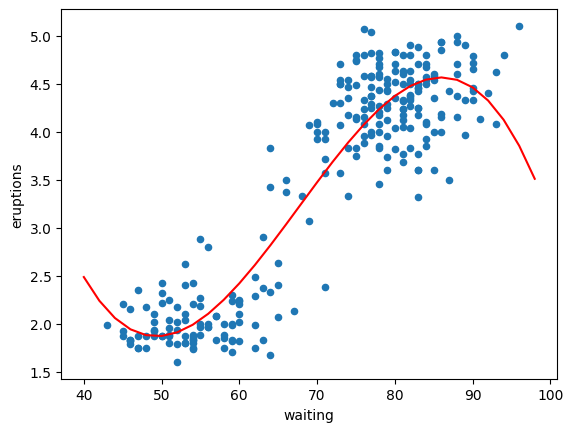

In [73]:
## Plotando os gráficos
faithful.plot.scatter(x='waiting',
                      y='eruptions')

# Gerando eixo_x
eixo_x = torch.tensor(range(40,100,2))

# Normalizando
normal_x = (eixo_x - x_mean) / x_std

# Gerando eixo_y
eixo_y = a * normal_x**3 + b * normal_x**2 + c * normal_x + d

## Plotando no gráfico
plt.plot(eixo_x.tolist(), eixo_y.tolist(), color = 'red')


## Usando Funções do PyTorch

Embora tenhamos escrito um primeiro modelo utilizando a teoria básica e implementado manualmente algumas operações, como a função de custo e os parâmetros do modelo, o PyTorch oferece uma variedade de funções pré-definidas e otimizadas que facilitam o desenvolvimento.

Essas funções não só tornam o código mais conciso e fácil de entender, como também garantem que estamos seguindo as melhores práticas, utilizando algoritmos otimizados e ferramentas já testadas pela comunidade.

Ao utilizar essas funções do PyTorch, como otimização e cálculo de erros, podemos focar mais na lógica do problema e menos nos detalhes da implementação matemática.

In [74]:
## Bibliotecas que usaremos com frequência
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

## Formatando os Tensores

O método `.unsqueeze()` no PyTorch é utilizado para aumentar a dimensionalidade de um tensor, inserindo uma nova dimensão de tamanho 1 em um lugar específico.

No caso de `x.unsqueeze(-1)`, o `-1` indica que a nova dimensão será adicionada na última posição do tensor. Isso transforma o tensor `x` de um formato, por exemplo, de `(n,)` (onde `n` é o número de elementos) para `(n, 1)`. Ou seja, o tensor unidimensional com `n` elementos se torna um tensor bidimensional, mas com uma única coluna de `n` elementos.

Essa operação é útil em diversas situações, especialmente quando se trabalha com operações matriciais e vetoriais, garantindo que os tensores tenham as dimensões corretas para multiplicações, concatenações, ou outras operações.

Tente entender a operação com os códigos a seguir:


In [75]:
xx = x.unsqueeze(-1)
yy = y.unsqueeze(-1)

In [76]:
print(x)
print(xx)

tensor([ 0.5960, -1.2429,  0.2282, -0.6544,  1.0374, -1.1693,  1.2580,  1.0374,
        -1.4636,  1.0374, -1.2429,  0.9638,  0.5225, -1.7578,  0.8903, -1.3900,
        -0.6544,  0.9638, -1.3900,  0.5960, -1.4636, -1.7578,  0.5225, -0.1395,
         0.2282,  0.8903, -1.1693,  0.3754,  0.5225,  0.5960,  0.1547,  0.4489,
        -0.3602,  0.6696,  0.2282, -1.3900, -1.6842,  0.6696, -0.8751,  1.4051,
         0.6696, -0.9487,  0.9638, -0.9487,  0.1547,  0.8903, -0.5073, -1.3164,
         0.8167, -0.8751,  0.3018,  1.4051, -1.2429,  0.6696, -1.2429,  0.8903,
         0.0076, -0.5073,  0.4489,  0.7431, -0.8751,  0.9638, -1.6842,  0.8167,
        -0.8016,  1.5523,  0.5225,  0.5225, -0.4338,  0.1547,  0.8167, -1.0958,
         0.5960,  0.0076, -0.6544,  0.3754, -0.8016,  0.5225,  0.3754,  0.8903,
         0.3018,  0.8167, -0.0660, -0.4338,  0.1547,  1.2580,  0.3754,  0.6696,
        -1.6842,  1.1109, -0.8016,  1.4051, -1.5371,  0.5225, -0.5809,  0.0811,
         0.9638,  0.3018, -1.4636,  0.81

## Criando o Dataset

Um conceito importante no PyTorch está relacionado à organização e eficiência no treinamento de modelos: o uso de `DataLoader` e `TensorDataset` para facilitar o gerenciamento de dados.

O `TensorDataset` é uma maneira de agrupar os dados de entrada e os rótulos (nesse caso, `x` e `y`) em um único conjunto de dados, onde cada par de entrada e rótulo está alinhado. Isso garante que, durante o treinamento, o modelo receba consistentemente os dados corretos correspondentes aos rótulos adequados.

O `DataLoader` é responsável por dividir esse conjunto de dados em pequenos lotes (ou "mini-batches") para serem usados no processo de treinamento. Essa abordagem de dividir os dados em lotes melhora a eficiência computacional, especialmente ao treinar com grandes volumes de dados. Além disso, o parâmetro `shuffle=True` garante que os dados sejam embaralhados antes de serem alimentados no modelo, ajudando a evitar que o modelo aprenda padrões indesejados que podem surgir de uma ordem fixa dos dados.

Esses dois elementos, juntos, garantem que o processo de treinamento seja realizado de maneira eficiente e estruturada, com dados divididos em blocos menores e apresentados de forma aleatória ao modelo.


In [77]:
# Usando o DataLoader para carregar os dados
dataset = TensorDataset(xx, yy)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

## Criando Modelo

Criaremos agora um modelo de regressão cúbica utilizando a estrutura modular do PyTorch.

A classe `CubicModel` herda da classe base `nn.Module`, que é a classe central no PyTorch para todos os modelos. Esse padrão é essencial para organizar a arquitetura de um modelo e automatizar o processo de treinamento e ajuste dos parâmetros.

Dentro da classe, no método `__init__()`, os coeficientes `a`, `b`, `c`, e `d` são definidos como parâmetros treináveis usando `nn.Parameter`. Esses parâmetros são iniciados com valores aleatórios e serão ajustados automaticamente durante o processo de treinamento. O uso de `nn.Parameter` sinaliza ao PyTorch que esses valores devem ser considerados na otimização.

O método `forward()` define a operação que o modelo realiza em seus dados de entrada. Nesse caso, trata-se de uma regressão cúbica da forma $ax^3 + bx^2 + cx + d$, onde $x$ é a entrada e os coeficientes $a$, $b$, $c$, e $d$ são ajustados para minimizar o erro durante o treinamento.

Em resumo, o `CubicModel` é um exemplo de como o PyTorch estrutura o código para criar e treinar modelos de aprendizado de máquina. Ele encapsula a funcionalidade principal, permitindo que os parâmetros sejam ajustados automaticamente durante o treinamento para se adequarem melhor aos dados de entrada.


In [78]:
# Definindo o modelo de regressão cúbica
class CubicModel(nn.Module):
    def __init__(self):
        super(CubicModel, self).__init__()
        # Definindo os parâmetros a, b, c, d como parâmetros treináveis
        self.a = nn.Parameter(torch.rand(1))
        self.b = nn.Parameter(torch.rand(1))
        self.c = nn.Parameter(torch.rand(1))
        self.d = nn.Parameter(torch.rand(1))

    def forward(self, x):
        # Regressão cúbica: ax^3 + bx^2 + cx + d
        return self.a * x**3 + self.b * x**2 + self.c * x + self.d

In [79]:
# Instanciando o modelo
model = CubicModel()

## Definindo Custo e Otimização

Para treinar o modelo, podemos usar duas estruturas comuns no PyTorch: uma função de custo e um otimizador.

1. **Função de Custo (MSELoss)**:
   - No caso da regressão, estamos usando o **Erro Quadrático Médio (Mean Squared Error, MSE)**, implementado como `nn.MSELoss()` no PyTorch.

2. **Otimizador Adam**:
   - O otimizador é responsável por ajustar os parâmetros treináveis do modelo (a, b, c, d) para minimizar a função de custo.
   - Aqui, usamos o otimizador **Adam** (Adaptive Moment Estimation), que é um dos otimizadores mais eficientes e amplamente utilizados em aprendizado de máquina. Ele combina as vantagens dos otimizadores SGD (Stochastic Gradient Descent) e RMSProp.
   - `optimizer = optim.Adam(model.parameters(), lr=0.001)` indica que estamos usando Adam para atualizar os parâmetros do modelo, com uma taxa de aprendizado (*learning rate*) de 0.001.

A função de custo e o otimizador trabalham juntos para atualizar os pesos do modelo durante o processo de treinamento. O otimizador Adam ajusta os parâmetros do modelo de maneira eficiente, enquanto a função de custo orienta o otimizador a melhorar o desempenho do modelo.


In [80]:
# Definindo a função de custo (MSELoss) e o otimizador Adam
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Modularizando o Treinamento

O código a seguir define a função de treinamento do modelo e a executa por um número determinado de épocas:

1. **Função `train_model(epochs)`**:
   - O método `model.train()` coloca o modelo em modo de treinamento, o que ativa algumas funcionalidades internas importantes, como o ajuste dos parâmetros.
   - O loop principal percorre o número de épocas definido pelo parâmetro `epochs`. A cada época, o erro acumulado (*running_loss*) é calculado para monitorar o desempenho do modelo.
   - Dentro de cada época, iteramos sobre os batches de dados fornecidos pelo `dataloader`. Isso permite que os dados sejam processados em pequenos blocos, o que melhora a eficiência do treinamento e o uso da memória.
   - Para cada batch:
     - O otimizador é resetado com `optimizer.zero_grad()`, garantindo que os gradientes não se acumulem de uma iteração para outra.
     - O modelo realiza a previsão (*forward pass*) para os dados de entrada usando `y_pred = model(x_batch)`.
     - O erro é calculado usando a função de custo definida anteriormente. Aqui, usamos a função `criterion(y_pred, y_batch)`, que compara os valores previstos com os valores reais.
     - Em seguida, fazemos o cálculo do gradiente via *backpropagation* com o comando `loss.backward()`.
     - Finalmente, o otimizador atualiza os parâmetros do modelo com `optimizer.step()`, aplicando os gradientes calculados.
   - A cada 100 épocas, imprimimos o erro médio para monitorar o progresso.

2. **Execução do Treinamento**:
   - O modelo será treinado por 1.000 épocas com o comando `train_model(1000)`.


In [81]:
def train_model(epochs):
    model.train()  # Entrando no modo de treino
    for epoch in range(epochs):
        running_loss = 0.0

        # Iterando sobre os batches de dados
        for x_batch, y_batch in dataloader:
            # Resetando os gradientes
            optimizer.zero_grad()

            # Forward pass
            y_pred = model(x_batch)

            # Calculando o erro
            loss = criterion(y_pred, y_batch)

            # Backward pass (backpropagation)
            loss.backward()

            # Atualizando os parâmetros
            optimizer.step()

            running_loss += loss.item()

        if epoch % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(dataloader):.4f}")

# Treinando o modelo por 10000 épocas
train_model(1000)

Epoch 1/1000, Loss: 8.5660
Epoch 101/1000, Loss: 2.3140
Epoch 201/1000, Loss: 0.8544
Epoch 301/1000, Loss: 0.2713
Epoch 401/1000, Loss: 0.1794
Epoch 501/1000, Loss: 0.1772
Epoch 601/1000, Loss: 0.1770
Epoch 701/1000, Loss: 0.1771
Epoch 801/1000, Loss: 0.1771
Epoch 901/1000, Loss: 0.1772


<ipython-input-82-8d0a127ed72a>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_normalized_tensor = torch.tensor(x_normalized, dtype=torch.float32)


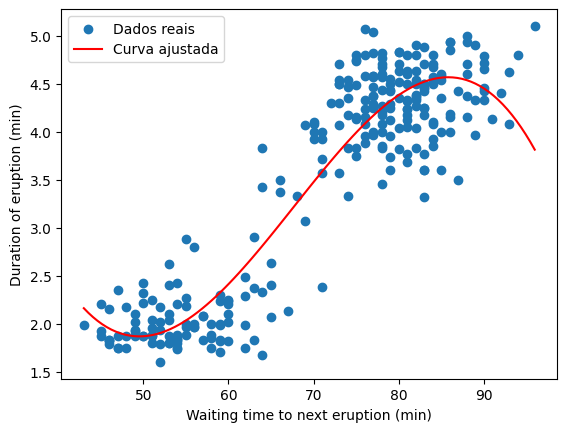

In [82]:
# Plotando os resultados
model.eval()  # Modo de avaliação
with torch.no_grad():
    # Gerando os dados para o gráfico
    x_vals = torch.linspace(faithful['waiting'].min(), faithful['waiting'].max(), 100).reshape(-1, 1)
    x_normalized = (x_vals - x_mean)/x_std  # Normalizando os dados
    x_normalized_tensor = torch.tensor(x_normalized, dtype=torch.float32)

    # Fazendo previsões
    y_vals = model(x_normalized_tensor)

    # Plotando os pontos reais e a curva ajustada
    plt.scatter(faithful['waiting'], faithful['eruptions'], label="Dados reais")
    plt.plot(x_vals.tolist(), y_vals.tolist(), color='red', label="Curva ajustada")
    plt.xlabel('Waiting time to next eruption (min)')
    plt.ylabel('Duration of eruption (min)')
    plt.legend()
    plt.show()

## Recaptulando

Na aula de hoje, aprendemos a usar o PyTorch, interpretando as suas funcionalidades em duas vertentes:

1. Possui uma estrutura de dados chamada Tensor, que permite realizar cálculos numéricos de maneira eficiente.
2. Possui uma forma de computar os gradientes da função de curso em função das variáveis que configuraram **requires_grad** como **True**.

Além dessas funcionalidades, o PyTorch possui várias funções, como a MSELoss e a BCELoss, que tornam a implementação dos algoritmos de aprendizado mais fáceis.